In this lecture, by Erin, she shows you how to compute solutions to the advection equation using various Method of Lines (MOL) schemes, using either python or MATLAB. In doing so, you can see how numerical instability manifests in the solution. She also discusses how to plot the amplification factor g(z;l) and how to use that to determine if the method is stable. She then discusses how to find the maximum of the amplification factor on the interval z in (-pi,pi). Finally, she discusses how to use BICGSTAB which is an iterative method for solving Ax = B and how to compute the difference between two solutions using "norm".

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy.linalg
import scipy.sparse.linalg
import scipy.optimize
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib.pyplot as plt
import time

In [2]:
#initialize 
#grid size
Time = 4 # show increasing 10
L = 20
n = 500
x2 = np.linspace(-L/2,L/2,n+1)
x = x2[0:n] #periodicity
dx = x[1] - x[0] #important to calculate correctly

#time
dt = 0.2 # show decreasing 0.1,0.05,0.02
time_steps = int(Time/dt)
t = np.arange(0,Time+dt,dt)
print(len(t))
print(t)

# CFL number
CFL = dt/dx
print(CFL)
#sparse matrix for derivative term
e1 = np.ones(n)
A = scipy.sparse.spdiags([e1,-e1,e1,-e1],[-n+1,-1,1,n-1],n,n);

21
[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4. ]
5.000000000000107


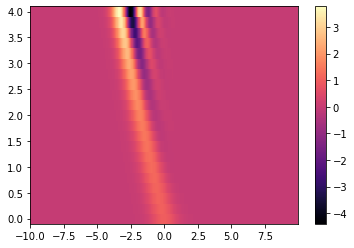

In [5]:
#Forward Euler
#initial conditions - FE
# print(f"length of x: {len(x)}")
# print(f"length of t: {len(t)}")
usol_fe =np.zeros((len(x),len(t))) #placeholder for solution - more effcient
u0 = np.exp(-x**2).T # Gaussian
usol_fe[:,0] = u0
u1 = u0

for j in range(time_steps):
    u2 = u1 + 0.5*CFL*A@u1
    u1 = u2
    usol_fe[:,j+1] = u2
    # print(f"at index: {j+1}")

#plotting 
fig,ax = plt.subplots(1,1)
T,X = np.meshgrid(t,x)
cp=ax.pcolor(x,t,usol_fe.T,cmap="magma",shading = 'auto') # point out instability for Time = 10
fig.colorbar(cp)
plt.show() 

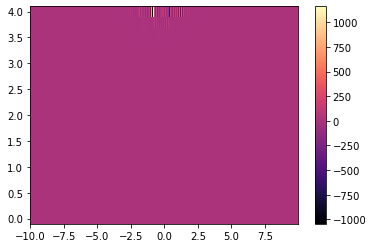

In [4]:
#Leapfrog
#initial conditions
usol_lf =np.zeros((len(x),len(t))) #placeholder for solution - more effcient
u0 = np.exp(-x**2).T # Gaussian
u1 = np.exp(-(x+dt)**2).T # Gaussian

usol_lf[:,0] = u0
usol_lf[:,1] = u1
for j in range(time_steps-1):
    u2 = u0 + CFL*A@u1
    u0 = u1
    u1 = u2
    usol_lf[:,j+2] = u2



#plotting 
fig,ax = plt.subplots(1,1)
T,X = np.meshgrid(t,x)
cp=ax.pcolor(x,t,usol_lf.T,cmap="magma",shading = 'auto') # point out instability for Time = 10
fig.colorbar(cp)
plt.show()

In [6]:
#Backward Euler
#initial conditions 
e1 = np.ones(n)
A = 0.5*scipy.sparse.spdiags([-CFL*e1,CFL*e1,2*e1,-CFL*e1,CFL*e1],[-n+1,-1,0,1,n-1],n,n,format='csc');
B = scipy.sparse.linalg.splu(A)
B

0.0014998912811279297


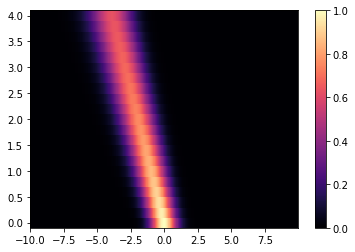

In [6]:
#Backward Euler
#initial conditions 
e1 = np.ones(n)
A = 0.5*scipy.sparse.spdiags([-CFL*e1,CFL*e1,2*e1,-CFL*e1,CFL*e1],[-n+1,-1,0,1,n-1],n,n,format='csc');
B = scipy.sparse.linalg.splu(A)

usol_be =np.zeros((len(x),len(t))) #placeholder for solution - more effcient
u0 = np.exp(-x**2).T # Gaussian
usol_be[:,0] = u0
start = time.time()
for j in range(time_steps):
    u1 = B.solve(u0)
    u0=u1
    usol_be[:,j+1] = u1

end = time.time()
print(end-start)

#plotting 
fig,ax = plt.subplots(1,1)
T,X = np.meshgrid(t,x)
cp=ax.pcolor(x,t,usol_be.T,cmap="magma",shading = 'auto') # point out instability for Time = 10
fig.colorbar(cp)
plt.show()

In [ ]:
usol_be_b =np.zeros((len(x),len(t))) #placeholder for solution - more effcient
u0 = np.exp(-x**2).T # Gaussian
usol_be_b[:,0] = u0
start = time.time()
for j in range(time_steps):
    u1,info= scipy.sparse.linalg.bicgstab(A,u0,x0 = u0)
    u0=u1
    usol_be_b[:,j+1] = u1

end = time.time()
print(end-start)

#plotting 
fig,ax = plt.subplots(1,1)
T,X = np.meshgrid(t,x)
cp=ax.pcolor(x,t,usol_be_b.T,cmap="magma",shading = 'auto') # point out instability for Time = 10
fig.colorbar(cp)
plt.show()

In [ ]:
dt = 0.02 # show decreasing 0.06
time_steps = int(Time/dt)
t = np.arange(0,Time+dt,dt)

# CFL number
CFL = dt/dx
print(CFL)
#sparse matrix for derivative term
e1 = np.ones(n)
A1 = scipy.sparse.spdiags([e1,-e1,e1,-e1],[-n+1,-1,1,n-1],n,n,format='csc')
A2 = scipy.sparse.spdiags([e1,e1,-2*e1,e1,-e1],[-n+1,-1,0,1,n-1],n,n,format='csc')
usol_lw =np.zeros((len(x),len(t))) #placeholder for solution - more effcient
u0 = np.exp(-x**2).T # Gaussian
usol_lw[:,0] = u0

for j in range(time_steps):
    u1 = u0 + 0.5*CFL*A1@u0+0.5*(CFL**2)*A2@u0
    u0=u1
    usol_lw[:,j+1] = u1


#plotting 
fig,ax = plt.subplots(1,1)
T,X = np.meshgrid(t,x)
cp=ax.pcolor(x,t,usol_lw.T,cmap="magma",shading = 'auto') # point out instability for Time = 10
fig.colorbar(cp)
plt.show()

In [ ]:
# von-Neumann analysis
G = lambda l,z: l**4*(4*np.sin(z/2)**4)+l**2*(np.sin(z)**2 - 4*np.sin(z/2)**2)+1
#-pi<z<pi

zvals =np.linspace(-np.pi,np.pi,50);
lvals = np.linspace(0.001,1.6,50);
[Z,L]=np.meshgrid(zvals,lvals);

fig, ax = plt.subplots(figsize=(10,10),subplot_kw={"projection": "3d"})
cp=ax.plot_surface(Z,L,G(L,Z),cmap="magma")


## Find the maximum of |g(1.5, z)|

Note that this was not done quite correctly in the video.

In [ ]:
G_one = lambda z: np.abs(G(1.5,z)); # Define the function we want to maximize
x = scipy.optimize.fminbound(lambda z:-G_one(z), -np.pi,np.pi) # This gives the *maximizer*
maximum = G_one(x)
print(maximum)

In [ ]:
G_one = lambda z: np.abs(G(0.5,z));
x = scipy.optimize.fminbound(lambda z:-G_one(z), -np.pi,np.pi)
maximum = G_one(x)
print(maximum)

In [ ]:
np.linalg.norm(usol_lw-usol_be)